In [5]:
import os
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import cmocean
import numpy as np
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import pandas as pd
from scipy.stats import linregress
from tabulate import tabulate

# change the directory to the folder that includes all the ARGO datasets
dir_cp_gyre = r'C:\Users\xliu38\OneDrive - University of Tasmania\Honours Research Project\Matlab code for Meander analysis\CP_gyre_index'
os.chdir(dir_cp_gyre)

In [6]:
# Open the gyre.nc file
gy_ind = xr.open_dataset('spgo_index_monthly.nc')

gy_ind

<xarray.Dataset>
Dimensions:    (time: 336)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-12-15
    longitude  float32 ...
Data variables:
    sla        (time) float64 ...

In [7]:
# Specify the time and sea level anomaly from this file
gy_ind_time = gy_ind.time
gy_ind_sla = gy_ind.sla

In [10]:
# Check the time and sea level anomaly variable
gy_ind_sla

<xarray.DataArray 'sla' (time: 336)>
array([-0.086283, -0.082937, -0.052606, ...,  0.061075,  0.059886,  0.065764])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-12-15
    longitude  float32 170.1

In [29]:
# Specify the time variable within the 1993-01 to 2020-05 period
gy_ind_time_202005 = gy_ind_time.where(gy_ind_time < np.datetime64('2020-06-15T00:00:00.000000000'), drop = True)
gy_ind_sla_202005 = gy_ind_sla.where(gy_ind_sla['time'] < np.datetime64('2020-06-15T00:00:00.000000000'), drop = True)

gy_ind_sla_202005

<xarray.DataArray 'sla' (time: 329)>
array([-8.62828125e-02, -8.29375000e-02, -5.26062500e-02, -7.20715625e-02,
       -6.98331250e-02, -5.62878125e-02, -5.66434375e-02, -4.95937500e-02,
       -5.52234375e-02, -6.85918750e-02, -6.70268750e-02, -4.99731250e-02,
       -4.04275000e-02, -4.45709375e-02, -4.58603125e-02, -4.11134375e-02,
       -2.96046875e-02, -4.81887500e-02, -5.58790625e-02, -5.90159375e-02,
       -4.26728125e-02, -6.29837500e-02, -9.81506250e-02, -9.60062500e-02,
       -9.66365625e-02, -7.44993750e-02, -7.08190625e-02, -6.10868750e-02,
       -5.34928125e-02, -5.80356250e-02, -6.57115625e-02, -7.14209375e-02,
       -6.30746875e-02, -4.64368750e-02, -4.46396875e-02, -5.22590625e-02,
       -5.93693750e-02, -3.99590625e-02, -2.66106250e-02, -3.36237500e-02,
       -2.42593750e-02, -3.26368750e-02, -4.26437500e-02, -2.73671875e-02,
       -2.01434375e-02, -1.96568750e-02, -1.97565625e-02, -4.13490625e-02,
       -4.56931250e-02, -3.38109375e-02, -2.67675000e-02, -3.21078125e-02,
       -4.10521875e-02, -4.53684375e-02, -3.87675000e-02, -5.88471875e-02,
       -7.45518750e-02, -6.84084375e-02, -7.27259375e-02, -7.90306250e-02,
       -8.30112500e-02, -8.34193750e-02, -8.68650000e-02, -8.06943750e-02,
       -6.68640625e-02, -4.72800000e-02, -4.70268750e-02, -4.92506250e-02,
       -3.81353125e-02, -6.14996875e-02, -5.19218750e-02, -1.71034375e-02,
       -1.72634375e-02, -1.89659375e-02, -2.01796875e-02, -1.65368750e-02,
        2.15000000e-04, -4.70593750e-03, -1.55640625e-02, -3.97000000e-03,
...
        2.03368750e-02,  2.49925000e-02,  3.33365625e-02,  2.23646875e-02,
        2.03453125e-02,  1.31496875e-02,  2.55015625e-02,  1.07612500e-02,
        2.26196875e-02,  2.68787500e-02,  5.14000000e-03,  1.06646875e-02,
        3.68790625e-02,  2.44900000e-02,  2.15440625e-02,  2.71365625e-02,
        2.56275000e-02,  4.34375000e-03,  6.43062500e-03, -1.41862500e-02,
       -2.75487500e-02, -8.16062500e-03,  9.41875000e-04,  7.52187500e-04,
       -1.74462500e-02, -2.21534375e-02, -1.13768750e-02, -6.96875000e-03,
        2.67034375e-02,  3.75959375e-02,  2.77565625e-02,  2.31312500e-02,
        2.55681250e-02,  4.27621875e-02,  3.89218750e-02,  2.36946875e-02,
        4.90756250e-02,  4.33978125e-02,  2.07190625e-02,  2.93325000e-02,
        1.39543750e-02,  2.83428125e-02,  3.32146875e-02,  2.70634375e-02,
        4.03368750e-02,  3.50018750e-02,  4.43331250e-02,  5.81571875e-02,
        5.27150000e-02,  5.20259375e-02,  4.26115625e-02,  3.89268750e-02,
        5.57593750e-02,  3.49290625e-02,  2.97137500e-02,  3.76090625e-02,
        2.70378125e-02,  3.88859375e-02,  4.57909375e-02,  5.28106250e-02,
        4.78528125e-02,  4.36675000e-02,  4.78975000e-02,  4.88334375e-02,
        3.51015625e-02,  4.92328125e-02,  5.93525000e-02,  6.37709375e-02,
        5.81912500e-02,  2.05434375e-02,  1.95078125e-02,  3.35103125e-02,
        4.96309375e-02,  5.36884375e-02,  3.38287500e-02,  3.66946875e-02,
        5.14375000e-02])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2020-05-15
    longitude  float32 170.1

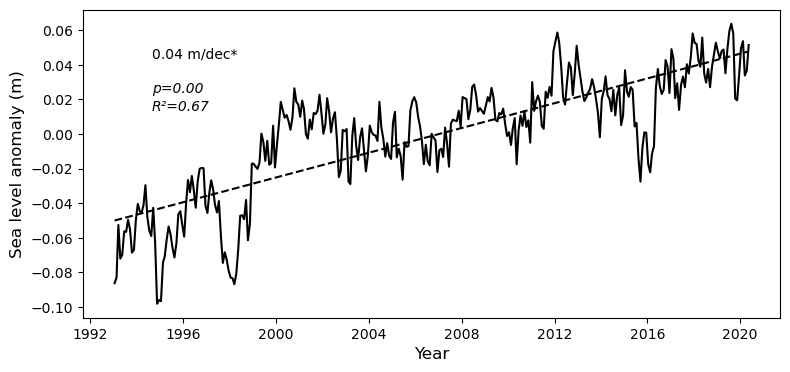

In [32]:
# Plot the time series of the gyre index strength
# Do the linear regression of the monthly mean zonal and meridional wind speeds analysis
fig = plt.figure(figsize=(9, 4))  # Increased the figure size

# Zonal component of the wind velocities: original time series
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(gy_ind_time_202005, gy_ind_sla_202005, c='black', label='Whole Meander')

# Perform linear regression
slope_gy_ind_202005_wh, intercept_gy_ind_202005_wh, r_gy_ind_202005_wh, p_gy_ind_202005_wh, std_err_gy_ind_202005_wh =\
linregress(gy_ind_time_202005.astype('float64'), gy_ind_sla_202005)

# Calculate regression line
reg_gy_ind_202005_wh = slope_gy_ind_202005_wh * gy_ind_time_202005.astype('float64') + intercept_gy_ind_202005_wh

# Calculate R-squared value
r_squ_gy_ind_202005_wh = r_gy_ind_202005_wh ** 2

ax1.plot(gy_ind_time_202005, reg_gy_ind_202005_wh, c='black', linestyle='--')

# Add the annotations of the linear trend for this plot
slope_gy_ind_202005_wh_str = '{:.2f} m/dec*'.format(slope_gy_ind_202005_wh*3.1536e+16*10)
p_gy_ind_202005_wh_str = 'p={:.2f}'.format(p_gy_ind_202005_wh)
r_squ_gy_ind_202005_wh_str = 'R\u00b2={:.2f}'.format(r_squ_gy_ind_202005_wh)

ax1.text(9000, 0.05, slope_gy_ind_202005_wh_str, ha='left', va='top', color='black')
ax1.text(9000, 0.03, p_gy_ind_202005_wh_str, ha='left', va='top', color='black', fontstyle='italic')
ax1.text(9000, 0.02, r_squ_gy_ind_202005_wh_str, ha='left', va='top', color='black', fontstyle='italic')

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Sea level anomaly (m)', fontsize=12)

# Save the figure
fig.savefig(f'CP_region_1993_2020_sea_level_anomaly_time_series.png', dpi=600, bbox_inches='tight')